In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#df=pd.read_csv('cardata.csv')
df=pd.read_csv('C:\\Users\\User\\Downloads\\cardata.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.drop(columns=['torque'],inplace = True)

In [5]:
#checking null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
#removing null values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [9]:
#removing duplicate records
df.duplicated().sum()

1189

In [10]:
#checking for duplicate records
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(6718, 12)

# Modifying the Columns

In [12]:
#creating a new column No_year(Number of years car used)

current_datetime=datetime.now()
current_year=current_datetime.year
print(current_year)
df["no_year"]=current_year-df["year"]

2024


In [13]:
# Drop column Year

df.drop(['year'],axis=1,inplace=True)

In [14]:
# Fuel_Type column :'Diesel':1,'Petrol':2, 'LPG':3 ,'CNG':4

print(df['fuel'].unique())
df['fuel'].replace({'Diesel':1,'Petrol':2, 'LPG':3 ,'CNG':4},inplace=True)

['Diesel' 'Petrol' 'LPG' 'CNG']


In [15]:
# Selling_type column :'Individual':1,'Dealer':2,'Trustmark Dealer':3

print(df['seller_type'].unique())
df['seller_type'].replace({'Individual':1,'Dealer':2,'Trustmark Dealer':3},inplace=True)

['Individual' 'Dealer' 'Trustmark Dealer']


In [16]:
# Transmission column :replacing manual with 1 and automatic with 2

print(df['transmission'].unique())
df['transmission'].replace({'Manual':1,'Automatic':2},inplace=True)

['Manual' 'Automatic']


In [17]:
#OWNER column: 'First Owner':1 ,'Second Owner':2 ,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5

print(df['owner'].unique())
df['owner'].replace({'First Owner':1 ,'Second Owner':2 ,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5},inplace=True)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [18]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_year
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,1,23.4 kmpl,1248 CC,74 bhp,5.0,10
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0,10
2,Honda City 2017-2020 EXi,158000,140000,2,1,1,3,17.7 kmpl,1497 CC,78 bhp,5.0,18
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,1,23.0 kmpl,1396 CC,90 bhp,5.0,14
4,Maruti Swift VXI BSIII,130000,120000,2,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,5.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,2,1,1,2,18.9 kmpl,998 CC,67.1 bhp,5.0,11
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,1,1,1,2,22.54 kmpl,1396 CC,88.73 bhp,5.0,10
8123,Hyundai i20 Magna,320000,110000,2,1,1,1,18.5 kmpl,1197 CC,82.85 bhp,5.0,11
8124,Hyundai Verna CRDi SX,135000,119000,1,1,1,4,16.8 kmpl,1493 CC,110 bhp,5.0,17


In [19]:
# Extracting the brand name
df['name'] = df['name'].str.split().str[0]

In [20]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [21]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

In [22]:
df.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
no_year          0
dtype: int64

# function to extract value from mileage, engine and max_power

In [23]:
def clean_data(value):
    value=str(value)
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        return np.nan
    else:
        
        return float(value)

In [24]:
df['mileage'] = df['mileage'].apply(clean_data)

In [25]:
df['engine'] = df['engine'].apply(clean_data)

In [26]:
df['max_power'] = df['max_power'].apply(clean_data)

In [27]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_year
0,1,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,10
1,2,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,10
2,3,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,18
3,4,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,14
4,1,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,17


In [28]:
df.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        1
seats            0
no_year          0
dtype: int64

In [29]:
df.dropna(inplace=True)

# data distribution

C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

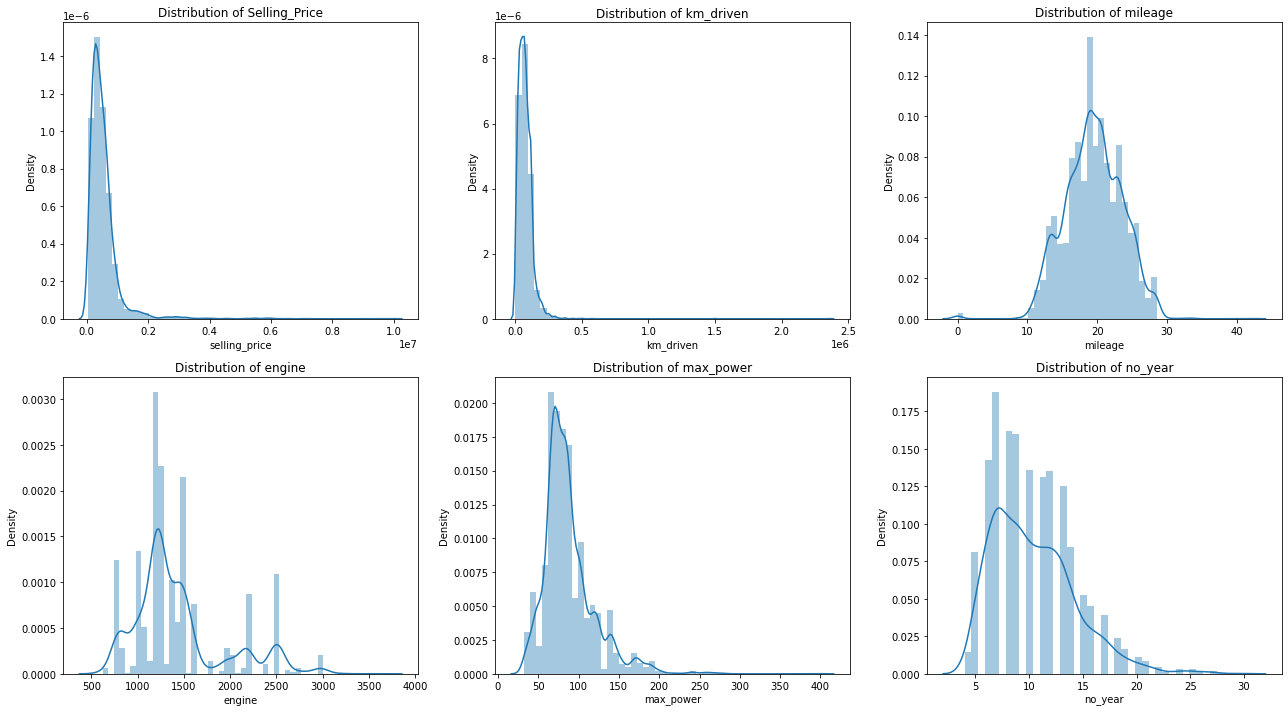

In [30]:
plt.figure(figsize=(18, 10))

# Plotting the first distplot for 'selling_price'
plt.subplot(2, 3, 1)
sns.distplot(df['selling_price'])
plt.title('Distribution of Selling_Price')


# Plotting the second distplot for 'km_driven'
plt.subplot(2,3,2)
sns.distplot(df['km_driven'])
plt.title('Distribution of km_driven')

# Plotting the third distplot for 'mileage'
plt.subplot(2, 3, 3)
sns.distplot(df['mileage'])
plt.title('Distribution of mileage')

# Plotting the fourth distplot for 'engine'

plt.subplot(2, 3,4 )
sns.distplot(df['engine'])
plt.title('Distribution of engine')

# Plotting the fifth distplot for 'max_power'

plt.subplot(2, 3, 5)
sns.distplot(df['max_power'])
plt.title('Distribution of max_power')

# Plotting the sixth distplot for 'no_year'

plt.subplot(2, 3, 6)
sns.distplot(df['no_year'])
plt.title('Distribution of no_year')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()



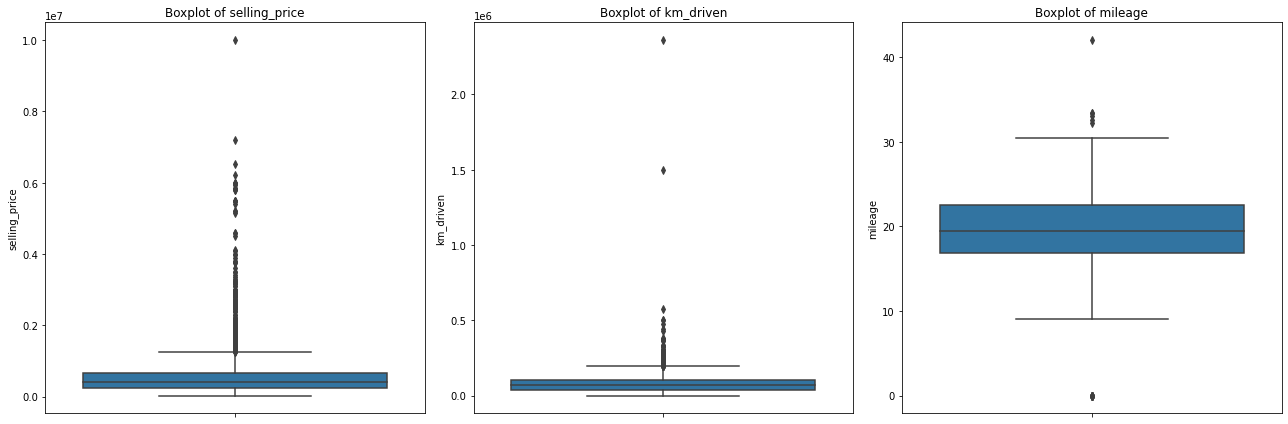

In [31]:
plt.figure(figsize=(18, 6))

# Plotting the first boxplot for selling_price
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='selling_price')
plt.title('Boxplot of selling_price')

# Plotting the second boxplot for 'km_driven
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='km_driven')
plt.title('Boxplot of km_driven')

# Plotting the third boxplot for mileage
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='mileage')
plt.title('Boxplot of mileage')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

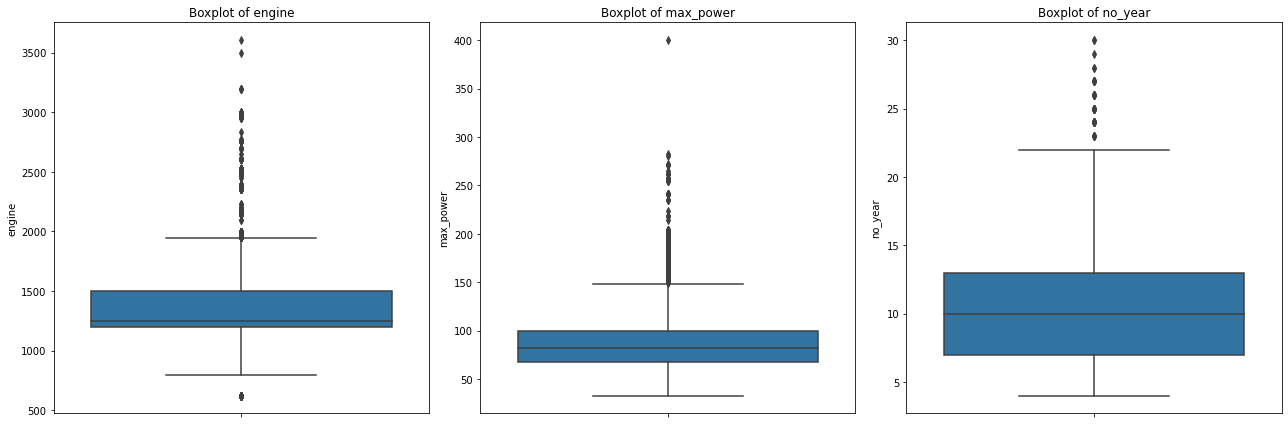

In [32]:
plt.figure(figsize=(18, 6))

# Plotting the first boxplot for engine

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='engine')
plt.title('Boxplot of engine')

# Plotting the second boxplot for max_power
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='max_power')
plt.title('Boxplot of max_power')

# Plotting the third boxplot for no_year
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='no_year')
plt.title('Boxplot of no_year')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Correlation Matrix


In [33]:
correlation_matrix = df.corr()
correlation_matrix

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_year
name,1.000000,0.251613,0.049784,-0.277496,0.047916,0.174458,-0.013379,-0.273961,0.369460,0.348463,0.155834,-0.033978
selling_price,0.251613,1.000000,-0.161265,-0.245558,0.250423,0.465538,-0.209265,-0.108655,0.442772,0.692323,0.158531,-0.427335
km_driven,0.049784,-0.161265,1.000000,-0.252491,-0.126336,-0.118965,0.252205,-0.196419,0.253460,0.041770,0.207890,0.387918
fuel,-0.277496,-0.245558,-0.252491,1.000000,-0.019724,0.005210,-0.012138,-0.035961,-0.510633,-0.328039,-0.343668,0.043564
seller_type,0.047916,0.250423,-0.126336,-0.019724,1.000000,0.213725,-0.151667,0.001552,0.065629,0.187339,-0.040726,-0.148137
transmission,0.174458,0.465538,-0.118965,0.005210,0.213725,1.000000,-0.076854,-0.173667,0.219526,0.441681,-0.019314,-0.143997
owner,-0.013379,-0.209265,0.252205,-0.012138,-0.151667,-0.076854,1.000000,-0.188624,0.033741,-0.052018,0.007649,0.480096
mileage,-0.273961,-0.108655,-0.196419,-0.035961,0.001552,-0.173667,-0.188624,1.000000,-0.579153,-0.378609,-0.459188,-0.366048
engine,0.369460,0.442772,0.253460,-0.510633,0.065629,0.219526,0.033741,-0.579153,1.000000,0.683506,0.658711,0.019763
max_power,0.348463,0.692323,0.041770,-0.328039,0.187339,0.441681,-0.052018,-0.378609,0.683506,1.000000,0.259028,-0.159889


In [34]:
df.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
no_year          0
dtype: int64

In [35]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_year
0,1,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,10
1,2,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,10
2,3,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,18
3,4,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,14
4,1,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0,11
8122,4,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,10
8123,4,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,11
8124,4,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,17


# X is the independent variable ,Y is the dependent variable  variable


In [36]:
# X is the independent variable ,Y is the dependent variable  variable

x=df.drop(columns=['selling_price'])
y=df['selling_price'].values.reshape(-1, 1)

# BEST FEATURES

In [37]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)

# Fit SelectKBest to your data
fit = bestfeatures.fit(x, y)

# Create DataFrame to store feature scores
dfscores = pd.DataFrame(fit.scores_)

# Create DataFrame to store feature names
dfcolumns = pd.DataFrame(x.columns)

# Concatenate feature names and scores into a single DataFrame for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Rename the columns
featureScores.columns = ['Specs', 'Score']

# Print the top 10 features with the highest scores
print(featureScores.nlargest(10, 'Score'))

           Specs        Score
8      max_power  6181.382158
4   transmission  1857.986653
7         engine  1637.476893
10       no_year  1500.224991
0           name   453.852706
3    seller_type   449.284164
2           fuel   430.886346
5          owner   307.528682
1      km_driven   179.295418
9          seats   173.112006


C:\Users\KOUSTAV\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DATA SCALING

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the features
x_scaled = scaler_x.fit_transform(x)

# Fit and transform the target variable
y_scaled = scaler_y.fit_transform(y).flatten()  # Flatten y to 1D array


# Random Forest Regressor Model

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model

rf_model = RandomForestRegressor(n_estimators=10, random_state=45)
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
mae=metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE score:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

MAE score:0.1530463136374124
Mean Squared Error: 0.08372642537719306
R^2 Score: 0.8954275160815178


# MODEL INPUT

In [40]:
columns = ['name', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'no_year']
dat = pd.DataFrame([[4, 90000, 1, 1, 1, 1, 19.67, 1582.0, 126.20, 5.0, 7]], columns=columns)


# SCALE THE INPUT DATA  AND INVERSEING THE OUTPUT BACK TO ORIGINAL SCALE

In [41]:
# Ensure the new data for prediction has the same columns as x
dat = dat[x.columns]

# Scale the new data
dat_scaled = scaler_x.transform(dat)

# Make predictions using the model
predictions_scaled = rf_model.predict(dat_scaled)

# Inverse transform the predictions to get them back to the original scale
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# Print the predictions in the original scale
print("Predictions (original scale):", predictions)

Predictions (original scale): [[1155399.9]]


In [42]:
df.sample(3)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_year
884,7,261000,90000,2,1,1,1,25.17,799.0,53.3,5.0,8
941,9,280000,160000,1,1,1,2,13.93,2956.0,138.1,7.0,17
2324,1,700000,6200,2,1,1,1,19.34,1462.0,103.0,7.0,6


In [43]:
import pickle as pk
pk.dump(rf_model,open('model.pkl','wb'))

In [44]:
pk.dump(scaler_x, open('scaler_x.pkl', 'wb'))

In [45]:
pk.dump(scaler_y, open('scaler_y.pkl', 'wb'))